### Building CNN from scratch using NUMPY

In [44]:
import numpy as np

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

lss = []

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h = x.dot(w1) # 64x1000 * 1000x100 = 64x100
    h_relu = np.maximum(h, 0) # 64x100
    y_pred = h_relu.dot(w2) # 64x100 * 100x10 = 64x10

    # Compute and print loss
    loss = np.square(y_pred - y).sum() # 64x10 - 64x10
    lss.append(loss)
    print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y) # 64x10
    grad_w2 = h_relu.T.dot(grad_y_pred) # w2(100x10) = h_relu(100x64)T * grad_y_pred(64x10)
    grad_h_relu = grad_y_pred.dot(w2.T) # grad_y_pred(64x10) * w2.T(10x100)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h) # x.T(1000x64) * grad_h(64x100)

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 31021965.435731433
1 24785270.23422894
2 23549636.542024527
3 23308685.2749205
4 21846498.804160036
5 18225494.652545728
6 13366382.801090442
7 8753202.68372355
8 5387028.253305197
9 3278365.223800318
10 2066078.2591855566
11 1381880.2306367722
12 988570.5142512004
13 750458.7560682285
14 596662.780144685
15 489983.0480956951
16 411330.6607034564
17 350405.12900741585
18 301640.36210303294
19 261620.87752992578
20 228189.43426758237
21 199943.19773624538
22 175888.86983544606
23 155256.51827552676
24 137466.91609325496
25 122065.43024612888
26 108685.9604683133
27 97009.21285528548
28 86794.82492601681
29 77870.13859100219
30 69997.05945157228
31 63055.16723680265
32 56917.62546984639
33 51487.79323356479
34 46657.08110675265
35 42342.28809359182
36 38482.91327053693
37 35028.32750087622
38 31930.739554024967
39 29145.514054263655
40 26635.940513902256
41 24371.45188544532
42 22325.16987519521
43 20473.299844850833
44 18791.991381734973
45 17266.04345629213
46 15879.487926019105
47 1

In [45]:
import matplotlib.pyplot as plt

In [46]:
lss

[31021965.435731433,
 24785270.23422894,
 23549636.542024527,
 23308685.2749205,
 21846498.804160036,
 18225494.652545728,
 13366382.801090442,
 8753202.68372355,
 5387028.253305197,
 3278365.223800318,
 2066078.2591855566,
 1381880.2306367722,
 988570.5142512004,
 750458.7560682285,
 596662.780144685,
 489983.0480956951,
 411330.6607034564,
 350405.12900741585,
 301640.36210303294,
 261620.87752992578,
 228189.43426758237,
 199943.19773624538,
 175888.86983544606,
 155256.51827552676,
 137466.91609325496,
 122065.43024612888,
 108685.9604683133,
 97009.21285528548,
 86794.82492601681,
 77870.13859100219,
 69997.05945157228,
 63055.16723680265,
 56917.62546984639,
 51487.79323356479,
 46657.08110675265,
 42342.28809359182,
 38482.91327053693,
 35028.32750087622,
 31930.739554024967,
 29145.514054263655,
 26635.940513902256,
 24371.45188544532,
 22325.16987519521,
 20473.299844850833,
 18791.991381734973,
 17266.04345629213,
 15879.487926019105,
 14617.939068805412,
 13466.338677662541,

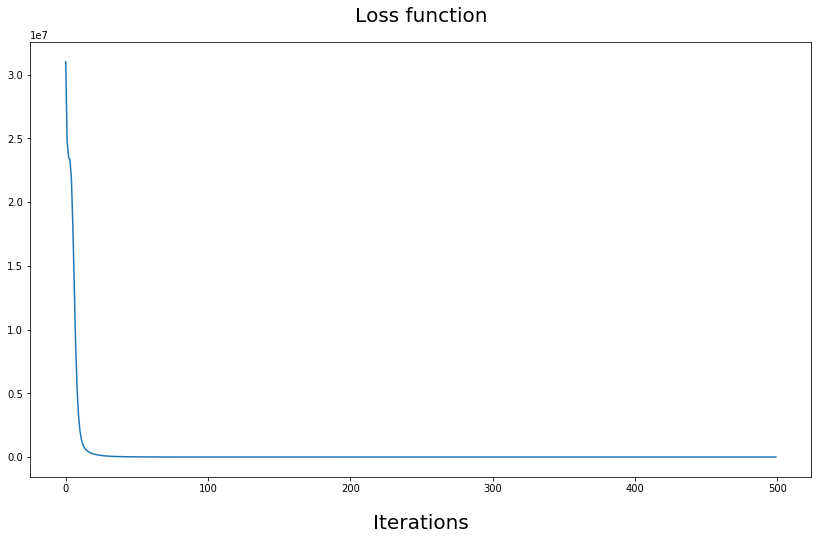

In [50]:
# plot results
plt.figure(figsize=(14,8))
plt.plot(lss);
plt.title('Loss function',fontsize=20, pad=20)
plt.xlabel('Iterations', fontsize=20, labelpad=20)
plt.savefig('Lossfunction')
plt.show()